In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [29]:
data = pd.read_csv('../datasets/marketing_and_sales_data_evaluate_lr.csv')
data.head()

,TV,Radio,Social_Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


In [30]:
data.shape

(4572, 4)

In [31]:
data[['TV','Radio','Social_Media']].describe()

,TV,Radio,Social_Media
count,4562.000000,4568.000000,4566.000000
mean,54.066857,18.160356,3.323956
std,26.125054,9.676958,2.212670
min,10.000000,0.000684,0.000031
25%,32.000000,10.525957,1.527849
50%,53.000000,17.859513,3.055565
75%,77.000000,25.649730,4.807558
max,100.000000,48.871161,13.981662


In [32]:
missing_sales = data.Sales.isnull().mean()
missing_sales = round(missing_sales*100, 2)
print('percentage of promotions missing sales: ' +  str(missing_sales) + '%')

percentage of promotions missing sales: 0.13%


In [33]:
data = data.dropna(axis=0, subset=['Sales'])

[Text(0.5, 1.0, 'Distribution of Sales')]

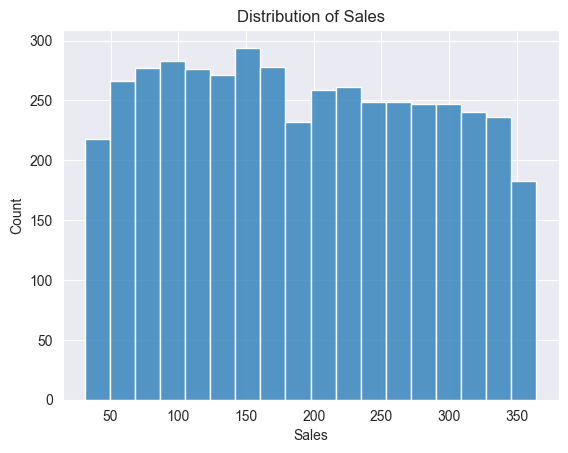

In [36]:
sns.histplot(data=data, x='Sales').set(title='Distribution of Sales')

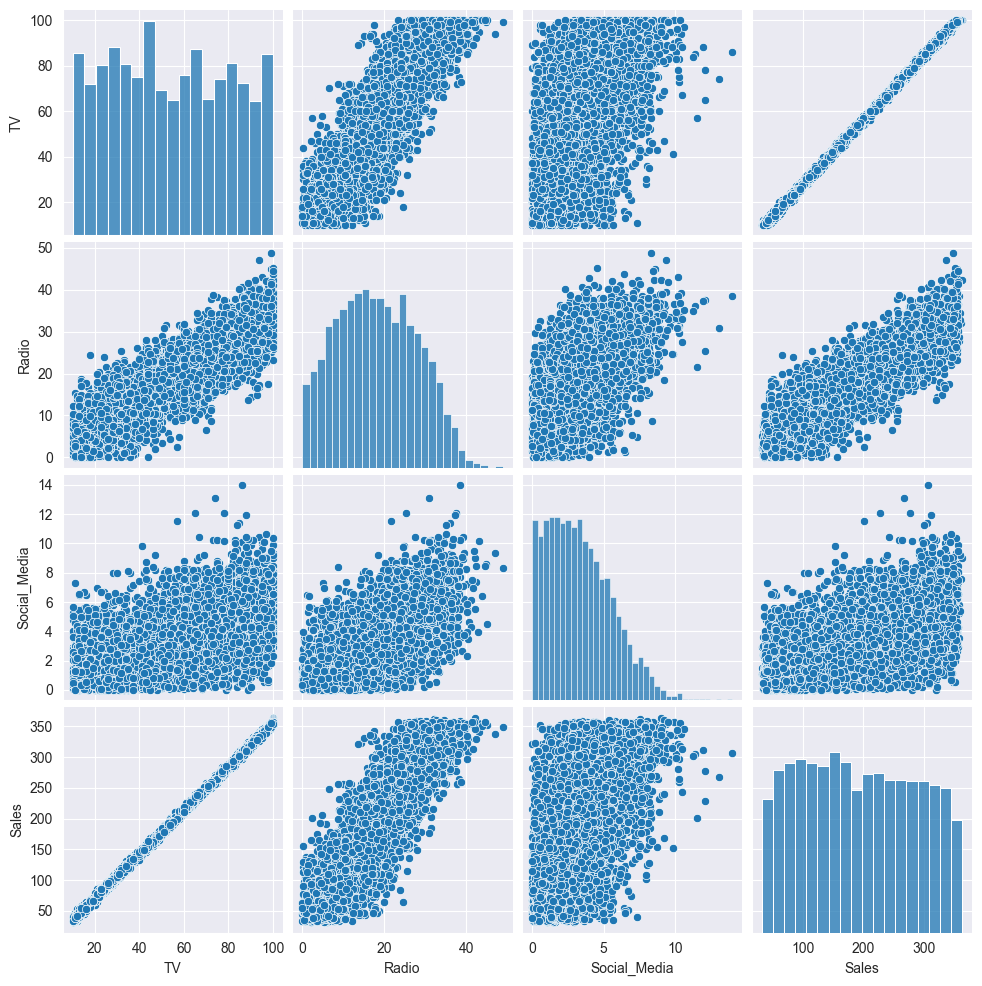

In [38]:
sns.pairplot(data=data)

according to the pair plot between two there is a strong correlation between tv promotion budget and sales.

In [40]:
ols_formula = "Sales ~ TV"

In [69]:
OLS = ols(formula=ols_formula, data=data[['TV', 'Sales']])
model = OLS.fit()
model_results = model.summary()
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Tue, 19 Aug 2025   Prob (F-statistic):               0.00
Time:                        21:14:53   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### checking model assumption

##### linearity assumption

<Axes: xlabel='TV', ylabel='Sales'>

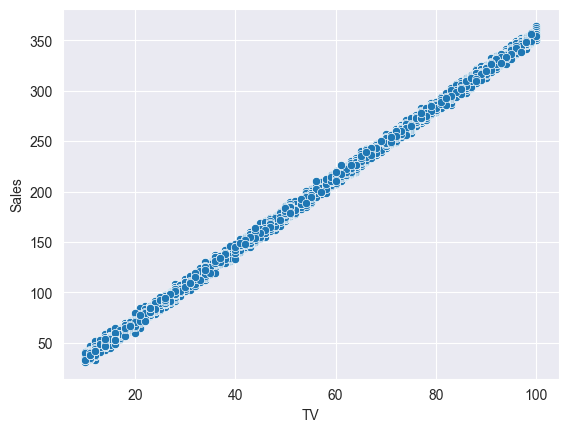

In [45]:
sns.scatterplot(data=data, x='TV', y='Sales')

there is a clear linear relationship between `TV` and `Sales`, meeting the linearity assumption.

##### independent observations assumption

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

##### normality assumption

this assumption states that the errors are normally distributed.

In [51]:
# finding the residuals
predicted_values = model.predict(data.TV)
actual_values = data['Sales']
residuals = data.Sales - predicted_values
# or just by using model.resid

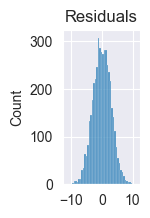

<Figure size 100x200 with 0 Axes>

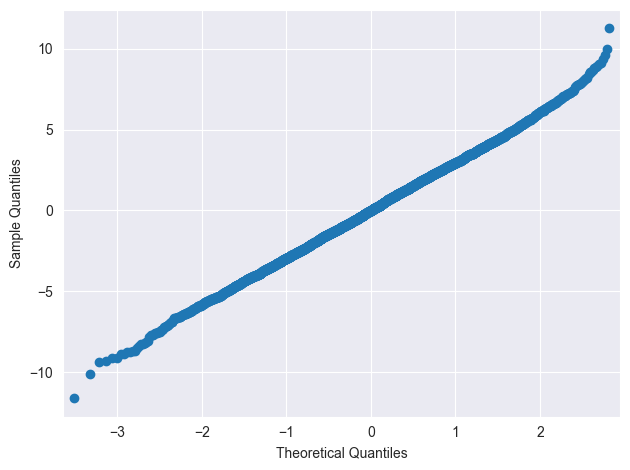

In [61]:
# histogram and Q-Q plot of the residuals

plt.figure(figsize=(1,2))
fig = sns.histplot(data=residuals).set_title('Residuals')
plt.figure(figsize=(1,2))
sm.qqplot(residuals, line='s')
plt.tight_layout()
plt.show()

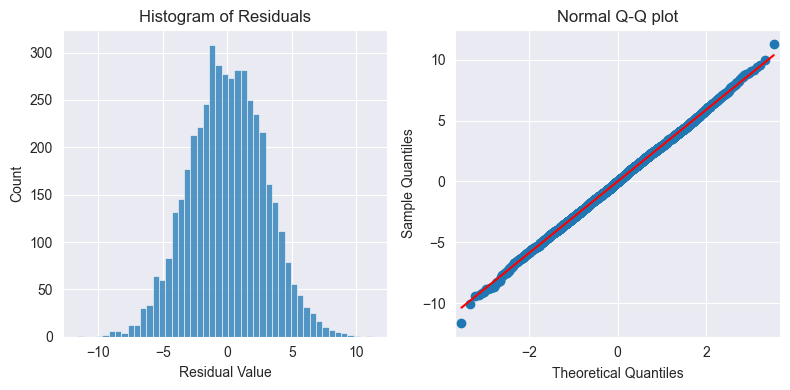

In [64]:
fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.histplot(residuals, ax=axes[0])

axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("Normal Q-Q plot")

plt.tight_layout()

plt.show()

the histogram of the residuals are approximately normally distributed which supports that the normality assumption is met for this model. the residuals in the Q-Q plot form a straight line, further supporting that the normality assumption is met.

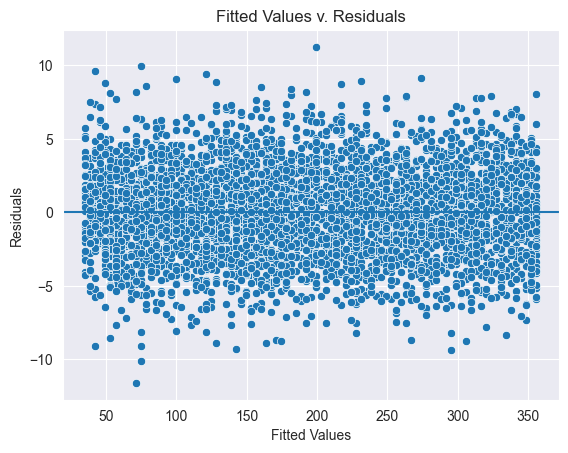

In [66]:
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")

fig.axhline(0)
plt.show()

the variance of the residuals is consistant across all X. thus, the assumption of homoscedasticity is met.

In [67]:
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Tue, 19 Aug 2025   Prob (F-statistic):               0.00
Time:                        20:35:34   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='TV', ylabel='Sales'>

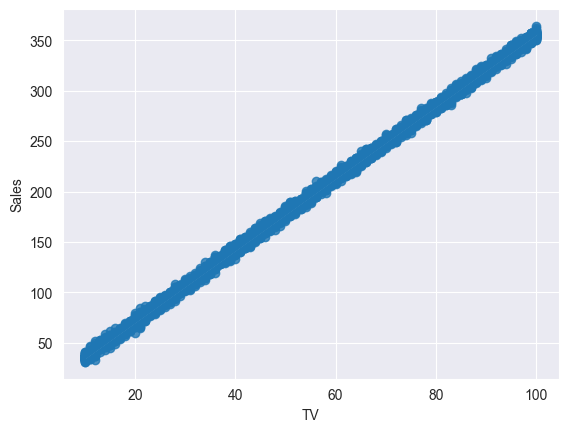

In [71]:
sns.regplot(x="TV", y="Sales", data=data)